In [10]:
!pip install kagglehub

import kagglehub

path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1


In [11]:
dataset_path = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog'

import os
gesture_folders = os.listdir(dataset_path)
print("Number of gestures:", len(gesture_folders))
print("Gesture categories:", gesture_folders[:5])


Number of gestures: 10
Gesture categories: ['09', '06', '01', '00', '03']


In [14]:
from PIL import Image
import os

def remove_corrupted_images(dataset_path):
    gesture_folders = os.listdir(dataset_path)
    for folder in gesture_folders:
        folder_path = os.path.join(dataset_path, folder)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                try:
                    img = Image.open(file_path)  
                    img.verify()  
                except (IOError, SyntaxError) as e:
                    print(f"Removing corrupted file: {file_path}")
                    os.remove(file_path)

remove_corrupted_images(dataset_path)
print("Corrupted images removed.")


Corrupted images removed.


In [17]:
import shutil
from sklearn.model_selection import train_test_split
import os

def organize_data(dataset_path, output_dir, test_size=0.2):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    gesture_folders = os.listdir(dataset_path)
    for folder in gesture_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):  
            continue

        images = os.listdir(folder_path)

        images = [image for image in images if os.path.isfile(os.path.join(folder_path, image))]

        if len(images) == 0:  
            print(f"No images found in folder {folder}, skipping.")
            continue

        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

        for image in train_images:
            shutil.copy(os.path.join(folder_path, image), os.path.join(train_dir, folder, image))
        for image in test_images:
            shutil.copy(os.path.join(folder_path, image), os.path.join(test_dir, folder, image))

    print("Data organized into train and test sets.")

output_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split'
organize_data(dataset_path, output_dir)


No images found in folder 09, skipping.
No images found in folder 06, skipping.
No images found in folder 01, skipping.
No images found in folder 00, skipping.
No images found in folder 03, skipping.
No images found in folder 02, skipping.
No images found in folder 04, skipping.
No images found in folder 05, skipping.
No images found in folder 08, skipping.
No images found in folder 07, skipping.
Data organized into train and test sets.


In [18]:
import shutil
from sklearn.model_selection import train_test_split
import os

def organize_data(dataset_path, output_dir, test_size=0.2):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    gesture_folders = os.listdir(dataset_path)

    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

    for folder in gesture_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path): 
            continue

        print(f"Contents of folder {folder}: {os.listdir(folder_path)}")

        images = [image for image in os.listdir(folder_path)
                  if os.path.isfile(os.path.join(folder_path, image)) and any(image.lower().endswith(ext) for ext in image_extensions)]

        if len(images) == 0:  
            print(f"No valid images found in folder {folder}, skipping.")
            continue

        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

        for image in train_images:
            shutil.copy(os.path.join(folder_path, image), os.path.join(train_dir, folder, image))
        for image in test_images:
            shutil.copy(os.path.join(folder_path, image), os.path.join(test_dir, folder, image))

    print("Data organized into train and test sets.")

output_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split'
organize_data(dataset_path, output_dir)


Contents of folder 09: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
No valid images found in folder 09, skipping.
Contents of folder 06: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
No valid images found in folder 06, skipping.
Contents of folder 01: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
No valid images found in folder 01, skipping.
Contents of folder 00: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
No valid images found in folder 00, skipping.
Contents of folder 03: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
No valid images found in folder 03, skipping.
Contents of folder 02: ['07_ok', '01_palm', '06_index', '08_palm_moved

In [19]:
import shutil
from sklearn.model_selection import train_test_split
import os

def organize_data(dataset_path, output_dir, test_size=0.2):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    gesture_folders = os.listdir(dataset_path)

    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

    for folder in gesture_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):  
            continue

        subfolders = os.listdir(folder_path)
        print(f"Contents of folder {folder}: {subfolders}")

        images = []
        for subfolder in subfolders:
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                images += [os.path.join(subfolder_path, image)
                            for image in os.listdir(subfolder_path)
                            if os.path.isfile(os.path.join(subfolder_path, image)) and
                            any(image.lower().endswith(ext) for ext in image_extensions)]

        if len(images) == 0:
            print(f"No valid images found in folder {folder}, skipping.")
            continue

        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

        for image in train_images:
            shutil.copy(image, os.path.join(train_dir, folder, os.path.basename(image)))
        for image in test_images:
            shutil.copy(image, os.path.join(test_dir, folder, os.path.basename(image)))

    print("Data organized into train and test sets.")

output_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split'
organize_data(dataset_path, output_dir)


Contents of folder 09: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 06: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 01: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 00: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 03: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 02: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 04: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Contents of folder 0

In [20]:
import shutil
from sklearn.model_selection import train_test_split
import os

def organize_data(dataset_path, output_dir, test_size=0.2):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    gesture_folders = os.listdir(dataset_path)

    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

    for folder in gesture_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):  
            continue

        subfolders = os.listdir(folder_path)
        print(f"Contents of folder {folder}: {subfolders}")

        images = []
        for subfolder in subfolders:
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                print(f"Checking subfolder: {subfolder_path}")
                valid_images = [os.path.join(subfolder_path, image)
                                for image in os.listdir(subfolder_path)
                                if os.path.isfile(os.path.join(subfolder_path, image)) and
                                any(image.lower().endswith(ext) for ext in image_extensions)]
                images += valid_images

        if len(images) == 0: 
            print(f"No valid images found in folder {folder}, skipping.")
            continue

        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

        for image in train_images:
            shutil.copy(image, os.path.join(train_dir, folder, os.path.basename(image)))
        for image in test_images:
            shutil.copy(image, os.path.join(test_dir, folder, os.path.basename(image)))

    print("Data organized into train and test sets.")

output_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split'
organize_data(dataset_path, output_dir)


Contents of folder 09: ['07_ok', '01_palm', '06_index', '08_palm_moved', '03_fist', '02_l', '09_c', '10_down', '04_fist_moved', '05_thumb']
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/07_ok
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/01_palm
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/06_index
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/08_palm_moved
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/03_fist
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/02_l
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog/09/09_c
Checking subfolder: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGe

In [21]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split/train'
test_dir = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/split/test'

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 429ms/step - accuracy: 0.1649 - loss: 2.2019 - val_accuracy: 0.6090 - val_loss: 1.2762
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 245s 430ms/step - accuracy: 0.4035 - loss: 1.5925 - val_accuracy: 0.7010 - val_loss: 0.8715
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 221s 436ms/step - accuracy: 0.4916 - loss: 1.3385 - val_accuracy: 0.7623 - val_loss: 0.6734
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 258s 430ms/step - accuracy: 0.5344 - loss: 1.2185 - val_accuracy: 0.7430 - val_loss: 0.6688
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 431ms/step - accuracy: 0.5901 - loss: 1.0734 - val_accuracy: 0.8165 - val_loss: 0.5061
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]  
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 433ms/step - accuracy: 0.6269 - loss: 0.9687 - val_accuracy: 0.8890 - val_loss: 0.3990
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 260s 430ms/step - accuracy: 0.6533 - loss: 0.9003 - val_accuracy: 0.9358 - val_loss: 0.2941
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 430ms/step - accuracy: 0.6910 - loss: 0.8008 - val_accuracy: 0.9380 - val_loss: 0.2187
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 223s 440ms/step - accuracy: 0.7282 - loss: 0.7195 - val_accuracy: 0.9600 - val_loss: 0.1469
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 430ms/step - accuracy: 0.7590 - loss: 0.6475 - val_accuracy: 0.9685 - val_loss: 0.1274
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [28]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9707 - loss: 0.1127
Test Loss: 0.127393901348114
Test Accuracy: 0.968500018119812


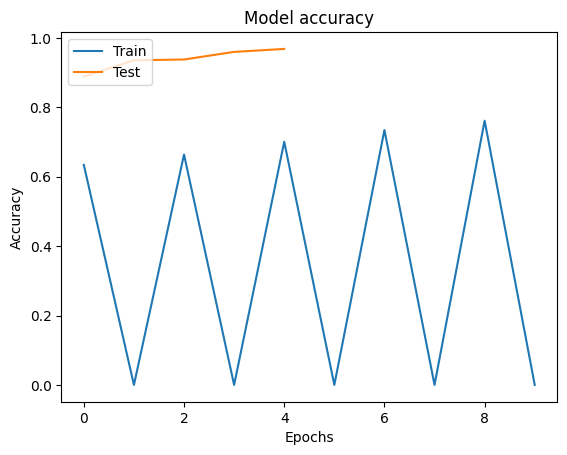

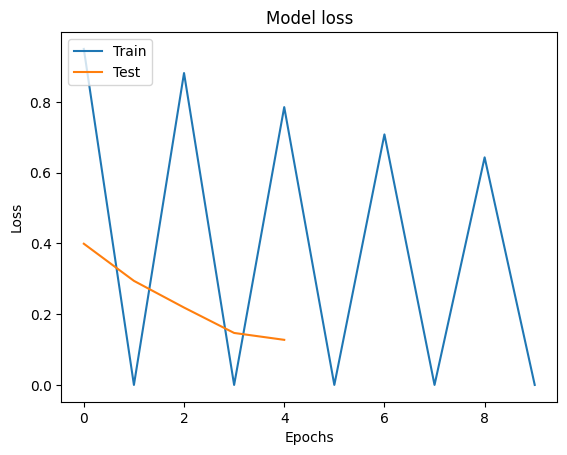

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/frame_01_04_0004.png' 
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  

img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_names = test_generator.class_indices  
predicted_class_name = list(class_names.keys())[predicted_class[0]]
print(f"Predicted Gesture: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
Predicted Gesture: 01


In [32]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, (224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_names = test_generator.class_indices
    predicted_class_name = list(class_names.keys())[predicted_class[0]]

    cv2.putText(frame, f"Gesture: {predicted_class_name}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Hand Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [34]:
model.save('gesture_recognition_model.keras')